In [162]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [60]:
boston = pd.read_csv('boston_marathon_results/boston_marathon_results_all.csv')
boston = boston.drop('Unnamed: 0',axis=1)
boston

/var/folders/zg/fhklgrzn3f9fp6svt46tyxfr0000gn/T/ipykernel_87708/2053906705.py:1: DtypeWarning: Columns (8,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  boston = pd.read_csv('boston_marathon_results/boston_marathon_results_all.csv')


,Year,Place Overall,Place Gender,Place Division,full_name,first_name,last_name,bib_number,Age,Gender,City,State,Official Time,Net Time,country,team,half_marathon_split
0,2019,17778,10733,4132,"Aaflaq, Peter",Peter,Aaflaq,2245,19.0,M,Carbondale,IL,4:06:23,4:05:22,USA,NaN,NaN
1,2019,17139,10486,1355,"Aaldijk, Aart",Aart,Aaldijk,28431,51.0,M,Raamsdonksveer,NaN,4:29:06,4:01:42,NED,NaN,NaN
2,2019,12140,3752,2553,"Aames, Susie",Susie,Aames,14710,29.0,F,Alhambra,CA,3:45:33,3:41:06,USA,NaN,NaN
3,2019,296,275,237,"Aarnes, Hans Chr.",Hans Chr.,Aarnes,411,34.0,M,Nittedal,NaN,2:38:31,2:38:27,NOR,NaN,NaN
4,2019,5050,4445,804,"Aaronson, Matt",Matt,Aaronson,3781,43.0,M,Chicago,IL,3:15:23,3:13:29,USA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93567,2023,26610,11419,527,"Magdaleno, Roselia",Roselia,Magdaleno,30985,NaN,F,NaN,NaN,06:29:38,06:25:34,NaN,–,02:52:35
93568,2023,26611,11420,4882,"Cooper, Rosalyn",Rosalyn,Cooper,14770,NaN,F,NaN,NaN,06:32:38,06:26:09,NaN,–,02:17:46
93569,2023,26613,11421,4883,"Myers, Laryssa",Laryssa,Myers,7781,NaN,F,NaN,NaN,06:35:37,06:30:07,NaN,–,02:42:01
93570,2023,26621,11422,815,"Foulds, Rhonda",Rhonda,Foulds,7552,NaN,F,NaN,NaN,07:02:44,06:56:34,NaN,–,03:09:48


In [61]:
boston_after_2019 = boston[boston['Year']>2019]
boston_after_2019

,Year,Place Overall,Place Gender,Place Division,full_name,first_name,last_name,bib_number,Age,Gender,City,State,Official Time,Net Time,country,team,half_marathon_split
26761,2021,1,1,1,"Kipruto, Benson (KEN)",Benson,Kipruto,4,NaN,M,NaN,NaN,02:09:51,02:09:51,KEN,–,01:06:22
26762,2021,2,2,2,"Berhanu, Lemi (ETH)",Lemi,Berhanu,3,NaN,M,NaN,NaN,02:10:37,02:10:37,ETH,–,01:06:23
26763,2021,3,3,3,"Yimer, Jemal (ETH)",Jemal,Yimer,21,NaN,M,NaN,NaN,02:10:38,02:10:38,ETH,–,01:06:21
26764,2021,4,4,4,"Ayana, Tsedat (ETH)",Tsedat,Ayana,12,NaN,M,NaN,NaN,02:10:47,02:10:47,ETH,–,01:06:22
26765,2021,5,5,5,"Barsoton, Leonard (KEN)",Leonard,Barsoton,22,NaN,M,NaN,NaN,02:11:11,02:11:11,KEN,–,01:06:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93567,2023,26610,11419,527,"Magdaleno, Roselia",Roselia,Magdaleno,30985,NaN,F,NaN,NaN,06:29:38,06:25:34,NaN,–,02:52:35
93568,2023,26611,11420,4882,"Cooper, Rosalyn",Rosalyn,Cooper,14770,NaN,F,NaN,NaN,06:32:38,06:26:09,NaN,–,02:17:46
93569,2023,26613,11421,4883,"Myers, Laryssa",Laryssa,Myers,7781,NaN,F,NaN,NaN,06:35:37,06:30:07,NaN,–,02:42:01
93570,2023,26621,11422,815,"Foulds, Rhonda",Rhonda,Foulds,7552,NaN,F,NaN,NaN,07:02:44,06:56:34,NaN,–,03:09:48


In [73]:
boston_after_2019 = boston[boston['Year']>2019]
boston_after_2019['Net Time'] = boston_after_2019['Net Time'].apply(change_mins_to_hours)
boston_after_2019['half_marathon_split'] = boston_after_2019['half_marathon_split'].apply(change_mins_to_hours)
boston_after_2019['second_half_time'] = boston_after_2019['Net Time'] - boston_after_2019['half_marathon_split']
boston_after_2019['second_half_pace']= boston_after_2019['second_half_time'].apply(get_pace)

boston_after_2019['first_half_pace']= boston_after_2019['half_marathon_split'].apply(get_pace)
boston_after_2019['pace_difference']= -1 * (boston_after_2019['first_half_pace'].apply(to_seconds) - boston_after_2019['second_half_pace'].apply(to_seconds))
boston_after_2019

/var/folders/zg/fhklgrzn3f9fp6svt46tyxfr0000gn/T/ipykernel_87708/760066014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_after_2019['Net Time'] = boston_after_2019['Net Time'].apply(change_mins_to_hours)
/var/folders/zg/fhklgrzn3f9fp6svt46tyxfr0000gn/T/ipykernel_87708/760066014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_after_2019['half_marathon_split'] = boston_after_2019['half_marathon_split'].apply(change_mins_to_hours)
/var/folders/zg/fhklgrzn3f9fp6svt46tyxfr0000gn/T/ipykern

,Year,Place Overall,Place Gender,Place Division,full_name,first_name,last_name,bib_number,Age,Gender,...,State,Official Time,Net Time,country,team,half_marathon_split,second_half_time,second_half_pace,first_half_pace,pace_difference
26761,2021,1,1,1,"Kipruto, Benson (KEN)",Benson,Kipruto,4,NaN,M,...,NaN,02:09:51,0 days 02:09:51,KEN,–,0 days 01:06:22,0 days 01:03:29,0 days 00:04:51,0 days 00:05:04,-13.0
26762,2021,2,2,2,"Berhanu, Lemi (ETH)",Lemi,Berhanu,3,NaN,M,...,NaN,02:10:37,0 days 02:10:37,ETH,–,0 days 01:06:23,0 days 01:04:14,0 days 00:04:54,0 days 00:05:04,-10.0
26763,2021,3,3,3,"Yimer, Jemal (ETH)",Jemal,Yimer,21,NaN,M,...,NaN,02:10:38,0 days 02:10:38,ETH,–,0 days 01:06:21,0 days 01:04:17,0 days 00:04:54,0 days 00:05:04,-10.0
26764,2021,4,4,4,"Ayana, Tsedat (ETH)",Tsedat,Ayana,12,NaN,M,...,NaN,02:10:47,0 days 02:10:47,ETH,–,0 days 01:06:22,0 days 01:04:25,0 days 00:04:55,0 days 00:05:04,-9.0
26765,2021,5,5,5,"Barsoton, Leonard (KEN)",Leonard,Barsoton,22,NaN,M,...,NaN,02:11:11,0 days 02:11:11,KEN,–,0 days 01:06:22,0 days 01:04:49,0 days 00:04:57,0 days 00:05:04,-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93567,2023,26610,11419,527,"Magdaleno, Roselia",Roselia,Magdaleno,30985,NaN,F,...,NaN,06:29:38,0 days 06:25:34,NaN,–,0 days 02:52:35,0 days 03:32:59,0 days 00:16:15,0 days 00:13:10,185.0
93568,2023,26611,11420,4882,"Cooper, Rosalyn",Rosalyn,Cooper,14770,NaN,F,...,NaN,06:32:38,0 days 06:26:09,NaN,–,0 days 02:17:46,0 days 04:08:23,0 days 00:18:58,0 days 00:10:31,507.0
93569,2023,26613,11421,4883,"Myers, Laryssa",Laryssa,Myers,7781,NaN,F,...,NaN,06:35:37,0 days 06:30:07,NaN,–,0 days 02:42:01,0 days 03:48:06,0 days 00:17:25,0 days 00:12:22,303.0
93570,2023,26621,11422,815,"Foulds, Rhonda",Rhonda,Foulds,7552,NaN,F,...,NaN,07:02:44,0 days 06:56:34,NaN,–,0 days 03:09:48,0 days 03:46:46,0 days 00:17:19,0 days 00:14:29,170.0


In [70]:
def to_seconds(pace) :
    return pace.total_seconds()

In [56]:
def get_pace(time) :
    x = time/13.1
    return x.round('s')

In [50]:
def change_mins_to_hours(time) :
    times = str(time).split(':')
    if len(times) > 2 :
        #print(times)
        if int(times[0]) > 12 : 
            x = pd.Timedelta(hours=0, minutes=int(times[0]),seconds=int(times[1]))
            #x = str(x)[7:]
            return x
        else :
            x = pd.Timedelta(hours=int(times[0]), minutes=int(times[1]),seconds=int(times[2]))
            #x = str(x)[7:]
            return x
    else :
        return np.nan

/Users/aschad/miniconda3/envs/firstEnv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='pace_difference', ylabel='Count'>

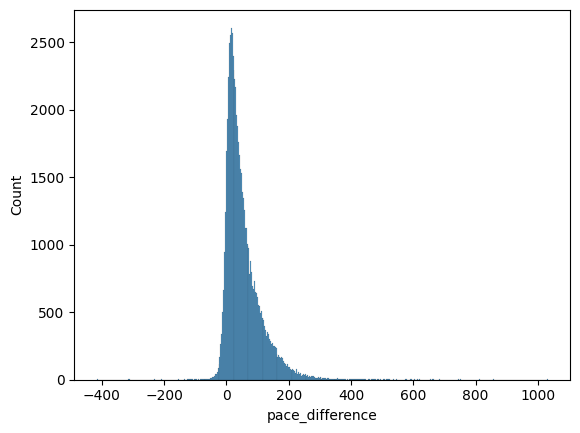

In [227]:
sns.histplot(boston_after_2019['pace_difference'].astype(float))

In [139]:
fig = px.scatter_matrix(seattle[['pace_difference','PlaceSorting']])
fig.show()

In [136]:
fig = px.violin(boston_after_2019, y="pace_difference",x='PlaceSorting')#px.histogram(boston_after_2019, x="pace_difference", nbins=8,histfunc="avg")
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Year', 'Place Overall', 'Place Gender', 'Place Division', 'full_name', 'first_name', 'last_name', 'bib_number', 'Age', 'Gender', 'City', 'State', 'Official Time', 'Net Time', 'country', 'team', 'half_marathon_split', 'second_half_time', 'second_half_pace', 'first_half_pace', 'pace_difference'] but received: PlaceSorting

In [120]:
boston_after_2019['pace_difference'].describe()

count    66674.000000
mean        53.208327
std         57.426761
min       -416.000000
25%         15.000000
50%         37.000000
75%         76.000000
max       1032.000000
Name: pace_difference, dtype: float64

In [ ]:
sns.histplot(boston_after_2019

In [74]:
seattle = pd.read_csv('seattle_marathon_results_all.csv')
seattle

,PlaceSorting,BIB,Gender Place,Age Group Place,Age Group Gender Place,NAME,GENDER,AGE,7M Place,7M NET TIME,...,15.6M NET TIME,16M Place,16M NET TIME,21M Place,21M NET TIME,23M Place,23M NET TIME,CHIP TIME,OVERALL PACE,Year
0,1,1760,1 / 1199,1 / 206,1 / 140,Max Randal,Male,24,1.0,38:55:00,...,1:26:02,1.0,1:29:13,1.0,1:57:27,1.0,2:06:53,2:27:03,0:05:37,2023
1,2,2807,2 / 1199,1 / 324,1 / 235,Nathan Richards,Male,31,3.0,39:49:00,...,1:28:14,2.0,1:31:33,2.0,2:00:17,2.0,2:09:23,2:29:58,0:05:44,2023
2,3,1980,3 / 1199,1 / 202,1 / 143,Keith Laverty,Male,36,4.0,39:51:00,...,1:28:15,3.0,1:31:34,3.0,2:00:19,3.0,2:09:51,2:32:07,0:05:49,2023
3,4,1211,4 / 1199,2 / 202,2 / 143,Joseph Darda,Male,36,7.0,39:53:00,...,1:28:19,4.0,1:31:34,4.0,2:00:53,5.0,2:10:34,2:32:11,0:05:49,2023
4,5,2838,5 / 1199,2 / 324,2 / 235,Shaun Stephens-Whale,Male,34,2.0,39:49:00,...,1:28:18,5.0,1:31:35,5.0,2:00:53,4.0,2:10:33,2:32:46,0:05:50,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,1719,1623,1198 / 1199,65 / 65,42 / 42,Sean Matlock,Male,56,1696.0,1:50:47,...,4:17:50,1718.0,4:28:29,1697.0,6:01:22,1716.0,6:30:57,7:40:20,0:17:34,2023
1719,1720,2312,518 / 520,324 / 324,86 / 86,Ghadah Gadi,Female,34,1658.0,1:32:57,...,3:44:54,1698.0,3:57:47,1690.0,5:41:12,1710.0,6:17:13,7:51:10,0:17:59,2023
1720,1721,1788,519 / 520,29 / 29,9-Sep,Linda Denise Salo,Female,61,1697.0,1:51:29,...,4:39:36,1720.0,4:51:06,1698.0,6:29:35,1717.0,7:04:28,8:09:15,0:18:40,2023
1721,1722,1419,1199 / 1199,160 / 160,125 / 125,Josh Graves,Male,43,1700.0,1:56:31,...,4:44:28,1721.0,4:54:39,NaN,NaN,NaN,NaN,8:10:27,0:18:43,2023


In [77]:
seattle.columns

Index(['PlaceSorting', 'BIB', 'Gender Place', 'Age Group Place',
       'Age Group Gender Place', 'NAME', 'GENDER', 'AGE', '7M Place',
       '7M NET TIME', '13.1M Place', '13.1M NET TIME', '15.6M Place',
       '15.6M NET TIME', '16M Place', '16M NET TIME', '21M Place',
       '21M NET TIME', '23M Place', '23M NET TIME', 'CHIP TIME',
       'OVERALL PACE', 'Year', 'Net Time'],
      dtype='object')

In [114]:
seattle['Net Time'] = seattle['CHIP TIME']
seattle['half_marathon_split'] = seattle['13.1M NET TIME']
seattle['Net Time'] = seattle['Net Time'].apply(change_mins_to_hours)
seattle['half_marathon_split'] = seattle['half_marathon_split'].apply(change_mins_to_hours)
seattle['second_half_time'] = seattle['Net Time'] - seattle['half_marathon_split']
seattle['second_half_pace']= seattle['second_half_time'].apply(get_pace)

seattle['first_half_pace']= seattle['half_marathon_split'].apply(get_pace)
seattle['pace_difference']= -1 * (seattle['first_half_pace'].apply(to_seconds) - seattle['second_half_pace'].apply(to_seconds))
seattle

,PlaceSorting,BIB,Gender Place,Age Group Place,Age Group Gender Place,NAME,GENDER,AGE,7M Place,7M NET TIME,...,23M NET TIME,CHIP TIME,OVERALL PACE,Year,Net Time,half_marathon_split,second_half_time,second_half_pace,first_half_pace,pace_difference
0,1,1760,1 / 1199,1 / 206,1 / 140,Max Randal,Male,24,1.0,38:55:00,...,2:06:53,2:27:03,0:05:37,2023,0 days 02:27:03,0 days 01:12:54,0 days 01:14:09,0 days 00:05:40,0 days 00:05:34,6.0
1,2,2807,2 / 1199,1 / 324,1 / 235,Nathan Richards,Male,31,3.0,39:49:00,...,2:09:23,2:29:58,0:05:44,2023,0 days 02:29:58,0 days 01:14:16,0 days 01:15:42,0 days 00:05:47,0 days 00:05:40,7.0
2,3,1980,3 / 1199,1 / 202,1 / 143,Keith Laverty,Male,36,4.0,39:51:00,...,2:09:51,2:32:07,0:05:49,2023,0 days 02:32:07,0 days 01:14:18,0 days 01:17:49,0 days 00:05:56,0 days 00:05:40,16.0
3,4,1211,4 / 1199,2 / 202,2 / 143,Joseph Darda,Male,36,7.0,39:53:00,...,2:10:34,2:32:11,0:05:49,2023,0 days 02:32:11,0 days 01:14:19,0 days 01:17:52,0 days 00:05:57,0 days 00:05:40,17.0
4,5,2838,5 / 1199,2 / 324,2 / 235,Shaun Stephens-Whale,Male,34,2.0,39:49:00,...,2:10:33,2:32:46,0:05:50,2023,0 days 02:32:46,0 days 01:14:17,0 days 01:18:29,0 days 00:05:59,0 days 00:05:40,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,1719,1623,1198 / 1199,65 / 65,42 / 42,Sean Matlock,Male,56,1696.0,1:50:47,...,6:30:57,7:40:20,0:17:34,2023,0 days 07:40:20,0 days 03:36:08,0 days 04:04:12,0 days 00:18:38,0 days 00:16:30,128.0
1719,1720,2312,518 / 520,324 / 324,86 / 86,Ghadah Gadi,Female,34,1658.0,1:32:57,...,6:17:13,7:51:10,0:17:59,2023,0 days 07:51:10,0 days 03:02:02,0 days 04:49:08,0 days 00:22:04,0 days 00:13:54,490.0
1720,1721,1788,519 / 520,29 / 29,9-Sep,Linda Denise Salo,Female,61,1697.0,1:51:29,...,7:04:28,8:09:15,0:18:40,2023,0 days 08:09:15,0 days 03:51:54,0 days 04:17:21,0 days 00:19:39,0 days 00:17:42,117.0
1721,1722,1419,1199 / 1199,160 / 160,125 / 125,Josh Graves,Male,43,1700.0,1:56:31,...,NaN,8:10:27,0:18:43,2023,0 days 08:10:27,0 days 03:59:11,0 days 04:11:16,0 days 00:19:11,0 days 00:18:15,56.0


In [112]:
def time_to_str(time) :
    x = time.astype(str).str[7:]
   # print(x.values[0][:2])
    if x.values[0][:2] == '00' :
        return x.values[0][3:]
    else :
        return x

In [157]:
alex = seattle[seattle['NAME'] =='Alexander Schad'][['NAME','Net Time','half_marathon_split','second_half_time','first_half_pace','second_half_pace','pace_difference']]
alex['Marathon'] = 'Seattle 2023'
alex[['Net Time','half_marathon_split','second_half_time','first_half_pace','second_half_pace']] = alex[['Net Time','half_marathon_split','second_half_time','first_half_pace','second_half_pace']].apply(time_to_str)
alex





,NAME,Net Time,half_marathon_split,second_half_time,first_half_pace,second_half_pace,pace_difference,Marathon
411,Alexander Schad,03:47:14,01:42:46,02:04:28,07:51,09:30,99.0,Seattle 2023


In [158]:
Kipruto = boston_after_2019.loc[(boston_after_2019['Year'] == 2021) & (boston_after_2019['last_name'] == 'Kipruto')]
Kipruto = Kipruto[['full_name','Net Time','half_marathon_split','second_half_time','first_half_pace','second_half_pace','pace_difference']]
Kipruto['Marathon'] = 'Boston 2021'
Kipruto[['Net Time','half_marathon_split','second_half_time','first_half_pace','second_half_pace']] = Kipruto[['Net Time','half_marathon_split','second_half_time','first_half_pace','second_half_pace']].apply(time_to_str)
Kipruto





,full_name,Net Time,half_marathon_split,second_half_time,first_half_pace,second_half_pace,pace_difference,Marathon
26761,"Kipruto, Benson (KEN)",02:09:51,01:06:22,01:03:29,05:04,04:51,-13.0,Boston 2021


In [12]:
seattle[['first_name','last_name']] = seattle['NAME'].str.split(' ', n=1, expand=True)
#seattle['last_name'] = seattle['NAME'].str.split()[1]
seattle

,PlaceSorting,BIB,Gender Place,Age Group Place,Age Group Gender Place,NAME,GENDER,AGE,7M Place,7M NET TIME,...,16M NET TIME,21M Place,21M NET TIME,23M Place,23M NET TIME,CHIP TIME,OVERALL PACE,Year,first_name,last_name
0,1,1760,1 / 1199,1 / 206,1 / 140,Max Randal,Male,24,1.0,38:55:00,...,1:29:13,1.0,1:57:27,1.0,2:06:53,2:27:03,0:05:37,2023,Max,Randal
1,2,2807,2 / 1199,1 / 324,1 / 235,Nathan Richards,Male,31,3.0,39:49:00,...,1:31:33,2.0,2:00:17,2.0,2:09:23,2:29:58,0:05:44,2023,Nathan,Richards
2,3,1980,3 / 1199,1 / 202,1 / 143,Keith Laverty,Male,36,4.0,39:51:00,...,1:31:34,3.0,2:00:19,3.0,2:09:51,2:32:07,0:05:49,2023,Keith,Laverty
3,4,1211,4 / 1199,2 / 202,2 / 143,Joseph Darda,Male,36,7.0,39:53:00,...,1:31:34,4.0,2:00:53,5.0,2:10:34,2:32:11,0:05:49,2023,Joseph,Darda
4,5,2838,5 / 1199,2 / 324,2 / 235,Shaun Stephens-Whale,Male,34,2.0,39:49:00,...,1:31:35,5.0,2:00:53,4.0,2:10:33,2:32:46,0:05:50,2023,Shaun,Stephens-Whale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,1719,1623,1198 / 1199,65 / 65,42 / 42,Sean Matlock,Male,56,1696.0,1:50:47,...,4:28:29,1697.0,6:01:22,1716.0,6:30:57,7:40:20,0:17:34,2023,Sean,Matlock
1719,1720,2312,518 / 520,324 / 324,86 / 86,Ghadah Gadi,Female,34,1658.0,1:32:57,...,3:57:47,1690.0,5:41:12,1710.0,6:17:13,7:51:10,0:17:59,2023,Ghadah,Gadi
1720,1721,1788,519 / 520,29 / 29,9-Sep,Linda Denise Salo,Female,61,1697.0,1:51:29,...,4:51:06,1698.0,6:29:35,1717.0,7:04:28,8:09:15,0:18:40,2023,Linda,Denise Salo
1721,1722,1419,1199 / 1199,160 / 160,125 / 125,Josh Graves,Male,43,1700.0,1:56:31,...,4:54:39,NaN,NaN,NaN,NaN,8:10:27,0:18:43,2023,Josh,Graves


In [160]:
def to_pace_float(pace) :
    #print(pace)
    if type(pace) is not float :
        #print(pace / datetime.timedelta(minutes=1))
        return pace / datetime.timedelta(minutes=1)
    else :
        return pace 

In [174]:
seattle['pace_group'] = seattle['Net Time'] / 26.2 
seattle['pace_group'] = seattle['pace_group'].apply(to_pace_float)
seattle['pace_group_floor'] = np.floor(seattle['pace_group'])
seattle['negative_split'] = seattle['pace_difference'] <= 0
seattle

,PlaceSorting,BIB,Gender Place,Age Group Place,Age Group Gender Place,NAME,GENDER,AGE,7M Place,7M NET TIME,...,Year,Net Time,half_marathon_split,second_half_time,second_half_pace,first_half_pace,pace_difference,pace_group,pace_group_floor,negative_split
0,1,1760,1 / 1199,1 / 206,1 / 140,Max Randal,Male,24,1.0,38:55:00,...,2023,0 days 02:27:03,0 days 01:12:54,0 days 01:14:09,0 days 00:05:40,0 days 00:05:34,6.0,5.612595,5.0,False
1,2,2807,2 / 1199,1 / 324,1 / 235,Nathan Richards,Male,31,3.0,39:49:00,...,2023,0 days 02:29:58,0 days 01:14:16,0 days 01:15:42,0 days 00:05:47,0 days 00:05:40,7.0,5.723919,5.0,False
2,3,1980,3 / 1199,1 / 202,1 / 143,Keith Laverty,Male,36,4.0,39:51:00,...,2023,0 days 02:32:07,0 days 01:14:18,0 days 01:17:49,0 days 00:05:56,0 days 00:05:40,16.0,5.805980,5.0,False
3,4,1211,4 / 1199,2 / 202,2 / 143,Joseph Darda,Male,36,7.0,39:53:00,...,2023,0 days 02:32:11,0 days 01:14:19,0 days 01:17:52,0 days 00:05:57,0 days 00:05:40,17.0,5.808524,5.0,False
4,5,2838,5 / 1199,2 / 324,2 / 235,Shaun Stephens-Whale,Male,34,2.0,39:49:00,...,2023,0 days 02:32:46,0 days 01:14:17,0 days 01:18:29,0 days 00:05:59,0 days 00:05:40,19.0,5.830789,5.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,1719,1623,1198 / 1199,65 / 65,42 / 42,Sean Matlock,Male,56,1696.0,1:50:47,...,2023,0 days 07:40:20,0 days 03:36:08,0 days 04:04:12,0 days 00:18:38,0 days 00:16:30,128.0,17.569975,17.0,False
1719,1720,2312,518 / 520,324 / 324,86 / 86,Ghadah Gadi,Female,34,1658.0,1:32:57,...,2023,0 days 07:51:10,0 days 03:02:02,0 days 04:49:08,0 days 00:22:04,0 days 00:13:54,490.0,17.983461,17.0,False
1720,1721,1788,519 / 520,29 / 29,9-Sep,Linda Denise Salo,Female,61,1697.0,1:51:29,...,2023,0 days 08:09:15,0 days 03:51:54,0 days 04:17:21,0 days 00:19:39,0 days 00:17:42,117.0,18.673664,18.0,False
1721,1722,1419,1199 / 1199,160 / 160,125 / 125,Josh Graves,Male,43,1700.0,1:56:31,...,2023,0 days 08:10:27,0 days 03:59:11,0 days 04:11:16,0 days 00:19:11,0 days 00:18:15,56.0,18.719466,18.0,False


/Users/aschad/miniconda3/envs/firstEnv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0, 0.5, 'Count')

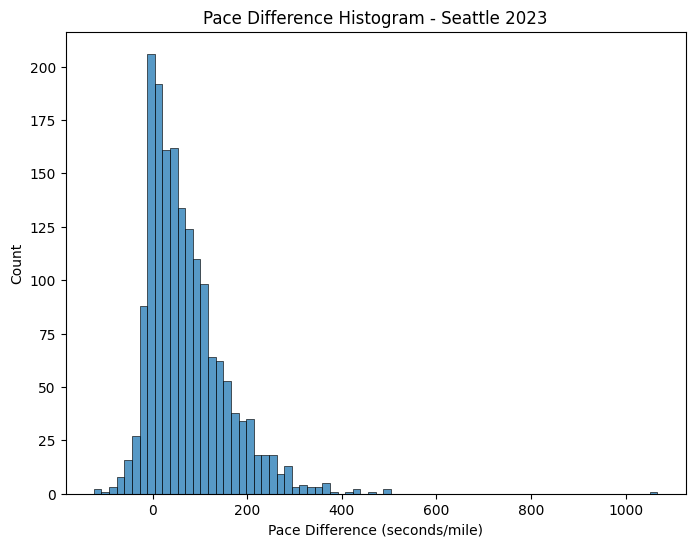

In [234]:
sns.histplot(seattle['pace_difference'].astype(float))
fig = plt.gcf()
fig.set_size_inches(8,6)
ax = plt.gca()
ax.set_title('Pace Difference Histogram - Seattle 2023')
ax.set_xlabel('Pace Difference (seconds/mile)')
ax.set_ylabel('Count')



In [184]:
from scipy.stats import chi2_contingency

In [175]:
seattle_2 = seattle.loc[(seattle['Net Time'] > datetime.timedelta(hours=2)) 
                        & (seattle['Net Time'] <= datetime.timedelta(hours=3))]
print(len(seattle_2))

seattle_3 = seattle.loc[(seattle['Net Time'] > datetime.timedelta(hours=3)) 
                        & (seattle['Net Time'] <= datetime.timedelta(hours=4))]
print(len(seattle_3))

seattle_4 = seattle.loc[(seattle['Net Time'] > datetime.timedelta(hours=4)) 
                        & (seattle['Net Time'] <= datetime.timedelta(hours=5))]
print(len(seattle_4))

seattle_5 = seattle.loc[(seattle['Net Time'] > datetime.timedelta(hours=5))]
print(len(seattle_5))





53
567
698
405


<Axes: xlabel='pace_difference', ylabel='PlaceSorting'>

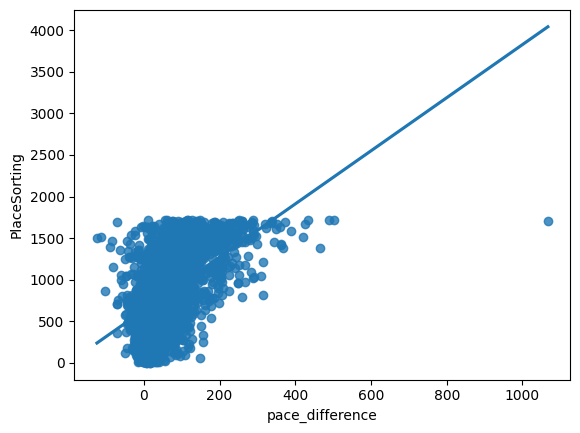

In [255]:
sns.regplot(data=seattle, x="pace_difference", y="PlaceSorting",ci=None)

In [260]:
seattle['pace_difference'].mean()

71.19709302325582

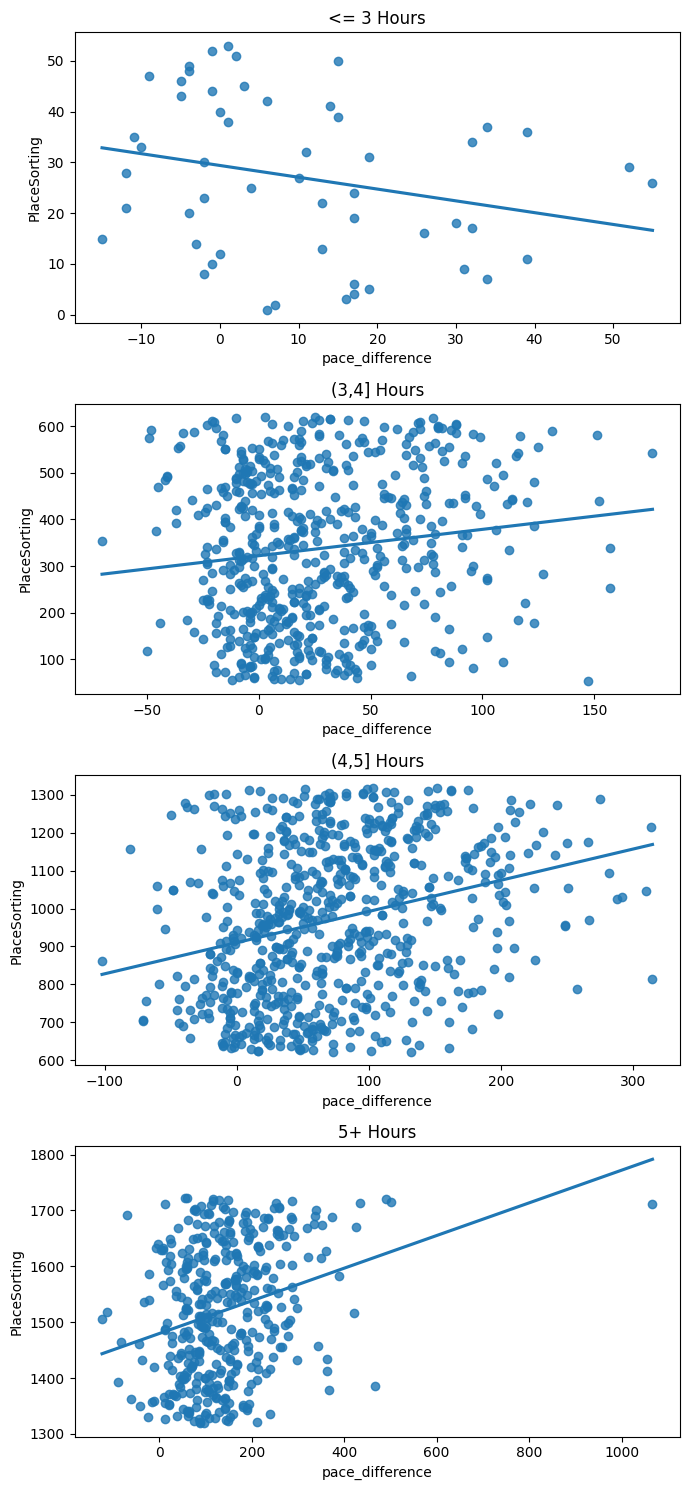

In [254]:
fig,axes = plt.subplots(4,1)

sns.regplot(data=seattle_2, x="pace_difference", y="PlaceSorting",ax=axes[0],ci=None)
axes[0].set_title('<= 3 Hours')
sns.regplot(data=seattle_3, x="pace_difference", y="PlaceSorting",ax=axes[1],ci=None)
axes[1].set_title('(3,4] Hours')
sns.regplot(data=seattle_4, x="pace_difference", y="PlaceSorting",ax=axes[2],ci=None)
axes[2].set_title('(4,5] Hours')
sns.regplot(data=seattle_5, x="pace_difference", y="PlaceSorting",ax=axes[3],ci=None)
axes[3].set_title('5+ Hours')

fig.set_size_inches(7,15)
fig.tight_layout()

In [180]:

seattle_2.groupby('negative_split').count()['PlaceSorting']

negative_split
False    33
True     20
Name: PlaceSorting, dtype: int64

In [203]:
p_2

0.37735849056603776

In [200]:
p_2 = 20/53
print(p_2 - 1.96 * (((p_2)*(1-p_2)/55)**0.5),p_2 + 1.96 * (((p_2)*(1-p_2)/55)**0.5))

0.24925209121377365 0.5054648899183019


In [181]:
seattle_3.groupby('negative_split').count()['PlaceSorting']

negative_split
False    398
True     169
Name: PlaceSorting, dtype: int64

In [201]:
p_3 = 169/567
print(p_3 - 1.96 * (((p_3)*(1-p_3)/567)**0.5),p_3 + 1.96 * ((p_3)*(1-p_3)/567)**0.5)

0.26040984415266016 0.3357100853006026


In [202]:
p_3

0.2980599647266314

In [189]:
len(seattle_3)

567

In [182]:
seattle_4.groupby('negative_split').count()['PlaceSorting']

negative_split
False    593
True     105
Name: PlaceSorting, dtype: int64

In [206]:
p_4

0.1504297994269341

In [204]:
p_4 = 105/698
print(p_4 - 1.96 * (((p_4)*(1-p_4)/698)**0.5),p_4 + 1.96 * ((p_4)*(1-p_4)/698)**0.5)

0.12390849176401324 0.17695110708985495


In [190]:
len(seattle_4)

698

In [183]:
seattle_5.groupby('negative_split').count()['PlaceSorting']

negative_split
False    387
True      18
Name: PlaceSorting, dtype: int64

In [207]:
p_5 = 18/405
print(p_5 - 1.96 * (((p_5)*(1-p_5)/405)**0.5),p_5 + 1.96 * ((p_5)*(1-p_5)/405)**0.5)

0.024373617258013666 0.06451527163087523


/var/folders/zg/fhklgrzn3f9fp6svt46tyxfr0000gn/T/ipykernel_87708/695951081.py:9: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.



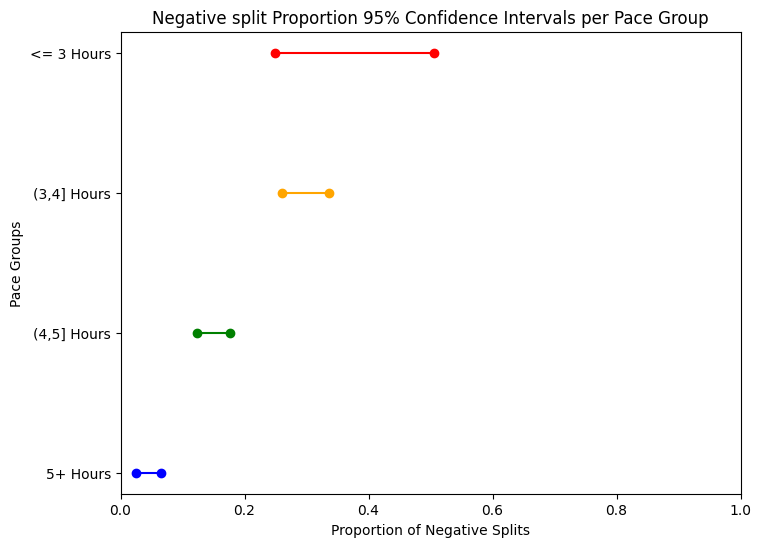

In [224]:
for cat,color,range_ in [
    
    ('5+ Hours','blue',[0.024373617258013666,0.06451527163087523]),
    ('(4,5] Hours','green',[0.12390849176401324,0.17695110708985495]),
    ('(3,4] Hours','orange',[0.26040984415266016,0.3357100853006026]),
    ('<= 3 Hours','red',[0.24925209121377365,0.5054648899183019]),
    
    ] :
    plt.plot((range_[0],range_[1]),(cat,cat),'ro-',color=color)
plt.xlim(0, 1)
fig = plt.gcf()
ax = plt.gca()
ax.set_title('Negative split Proportion 95% Confidence Intervals per Pace Group')
ax.set_xlabel('Proportion of Negative Splits')
ax.set_ylabel('Pace Groups')

fig.set_size_inches(8,6)
plt.show()

In [256]:
seattle.columns

Index(['PlaceSorting', 'BIB', 'Gender Place', 'Age Group Place',
       'Age Group Gender Place', 'NAME', 'GENDER', 'AGE', '7M Place',
       '7M NET TIME', '13.1M Place', '13.1M NET TIME', '15.6M Place',
       '15.6M NET TIME', '16M Place', '16M NET TIME', '21M Place',
       '21M NET TIME', '23M Place', '23M NET TIME', 'CHIP TIME',
       'OVERALL PACE', 'Year', 'Net Time', 'half_marathon_split',
       'second_half_time', 'second_half_pace', 'first_half_pace',
       'pace_difference', 'pace_group', 'pace_group_floor', 'negative_split'],
      dtype='object')

In [ ]:
plt.plot((lower,upper),(y,y),'ro-',color='orange')
plt.yticks(range(len(dataset)),list(dataset['category']))

In [191]:
len(seattle_5)

405

In [192]:
len(seattle)

1723

In [193]:
53+567+698+405

1723

In [ ]:
20+169+105+

In [187]:
seattle.groupby('negative_split').count()['PlaceSorting']

negative_split
False    1411
True      312
Name: PlaceSorting, dtype: int64

In [188]:
312/(1411+312)

0.18107951247823564

In [194]:
print(sum(negatives))
print(sum(positives))

312
1411


In [186]:
negatives = [20,169,105,18]
positives = [33,398,593,387]

result = chi2_contingency(np.array([negatives,positives]))
result

Chi2ContingencyResult(statistic=121.50285654399067, pvalue=3.6623047521413096e-26, dof=3, expected_freq=array([[  9.59721416, 102.67208358, 126.39349971,  73.33720255],
       [ 43.40278584, 464.32791642, 571.60650029, 331.66279745]]))

In [169]:
seattle.groupby('pace_group_floor').count()['pace_group']

pace_group_floor
5.0       7
6.0      55
7.0     161
8.0     327
9.0     345
10.0    301
11.0    206
12.0    144
13.0    100
14.0     31
15.0     26
16.0     10
17.0      7
18.0      2
19.0      1
Name: pace_group, dtype: int64

In [170]:
seattle['pace_group'].quantile([.25, .5, .75])

0.25     8.729008
0.50     9.888041
0.75    11.390585
Name: pace_group, dtype: float64

In [13]:
seattle_boston = pd.merge(seattle, boston,  how='inner', on=['first_name','last_name'],suffixes=['Seattle','Boston'])
seattle_boston

,PlaceSorting,BIB,Gender Place,Age Group Place,Age Group Gender Place,NAME,GENDER,AGE,7M Place,7M NET TIME,...,bib_number,Age,Gender,City,State,Official Time,Net Time,country,team,half_marathon_split
0,1,1760,1 / 1199,1 / 206,1 / 140,Max Randal,Male,24,1.0,38:55:00,...,316,NaN,M,NaN,NaN,02:26:47,02:26:45,NaN,–,01:10:10
1,4,1211,4 / 1199,2 / 202,2 / 143,Joseph Darda,Male,36,7.0,39:53:00,...,246,NaN,M,NaN,NaN,02:30:20,02:30:17,NaN,–,01:12:28
2,6,2567,6 / 1199,1 / 160,1 / 125,Rich Frazier,Male,42,10.0,40:53:00,...,388,NaN,M,NaN,NaN,02:40:38,02:40:26,NaN,–,01:19:09
3,21,1662,20 / 1199,1 / 123,Jan-85,Jeremy Bauer,Male,48,35.0,46:31:00,...,1135,44.0,M,Seattle,WA,2:48:39,2:48:02,USA,NaN,NaN
4,21,1662,20 / 1199,1 / 123,Jan-85,Jeremy Bauer,Male,48,35.0,46:31:00,...,916,NaN,M,NaN,NaN,02:57:09,02:56:56,NaN,–,01:27:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1623,1699,478 / 520,418 / 431,150 / 155,Grace Kim,Female,29,1527.0,1:21:51,...,20909,NaN,F,NaN,NaN,03:56:28,03:54:25,NaN,–,01:52:26
98,1623,1699,478 / 520,418 / 431,150 / 155,Grace Kim,Female,29,1527.0,1:21:51,...,23030,NaN,F,NaN,NaN,04:37:41,04:36:18,NaN,–,02:12:24
99,1628,2259,1145 / 1199,11-Sep,8-Jun,Young Cho,Male,71,1018.0,1:09:03,...,5637,40.0,M,New York,NY,3:07:09,3:04:16,USA,NaN,NaN
100,1670,1851,1170 / 1199,204 / 206,138 / 140,Bryan Wang,Male,24,920.0,1:06:49,...,19357,NaN,M,NaN,NaN,03:40:30,03:33:20,NaN,–,01:46:10


In [15]:
seattle_boston[seattle_boston['NAME'] == 'Jeremy Bauer'].values

array([[21, 1662, '20 / 1199', '1 / 123', 'Jan-85', 'Jeremy Bauer',
        'Male', 48, 35.0, '46:31:00', 34.0, '1:26:08', 35.0, '1:41:39',
        35.0, '1:45:23', 28.0, '2:17:03', 27.0, '2:27:13', '2:49:49',
        '0:06:29', 2023, 'Jeremy', 'Bauer', 1293, 2019, 899, 840, 86,
        'Bauer, Jeremy', '1135', 44.0, 'M', 'Seattle', 'WA', '2:48:39',
        '2:48:02', 'USA', nan, nan],
       [21, 1662, '20 / 1199', '1 / 123', 'Jan-85', 'Jeremy Bauer',
        'Male', 48, 35.0, '46:31:00', 34.0, '1:26:08', 35.0, '1:41:39',
        35.0, '1:45:23', 28.0, '2:17:03', 27.0, '2:27:13', '2:49:49',
        '0:06:29', 2023, 'Jeremy', 'Bauer', 3003, 2023, 3174, 3004, 208,
        'Bauer, Jeremy', '916', nan, 'M', nan, nan, '02:57:09',
        '02:56:56', nan, '–', '01:27:31']], dtype=object)